In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [29]:
dataset = pd.read_excel("Store.xls")

In [31]:
dataset.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [36]:
dataset.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [111]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [115]:
dataset["Order Year"] = dataset["Order Date"].dt.year

In [ ]:
#Customer Type Analysis

In [38]:
dataset['Segment'].value_counts()

Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

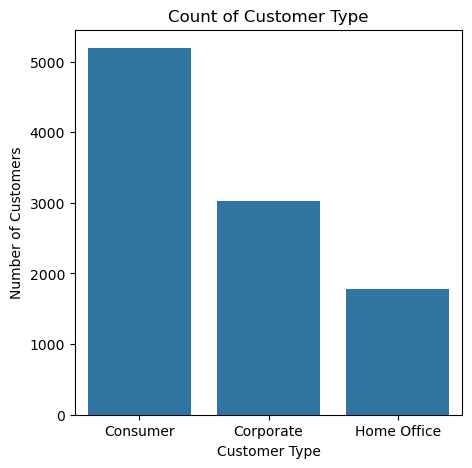

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(x="Segment",data=dataset)
plt.title("Count of Customer Type")
plt.xlabel("Customer Type")
plt.ylabel("Number of Customers")
plt.savefig("Count of Customers.jpg")
plt.show()

In [ ]:
#Shipping Mode Analysis

In [52]:
dataset["Ship Mode"].value_counts()

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

In [58]:
x = dataset["Ship Mode"].value_counts().index
y =dataset["Ship Mode"].value_counts().values

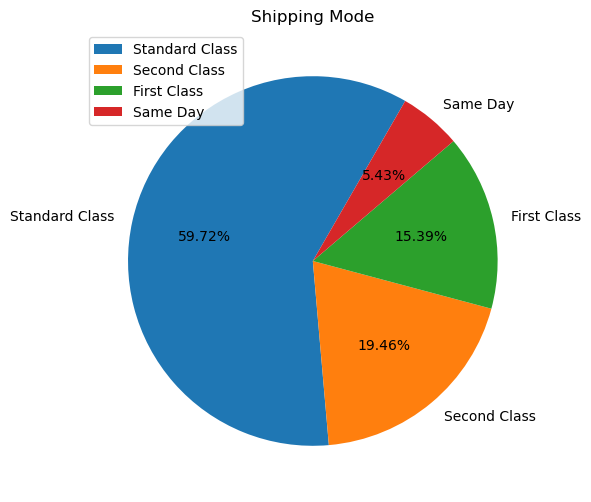

In [78]:
plt.figure(figsize=(6,6))
plt.pie(y,labels=x,startangle = 60,autopct="%0.2f%%")
plt.legend(loc=2)
plt.title("Shipping Mode")
plt.savefig("Shipping Mode.jpg")
plt.show()

In [ ]:
#Category Analysis

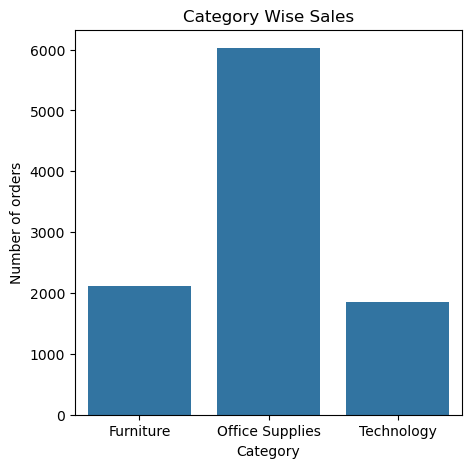

In [103]:
plt.figure(figsize=(5,5))
sns.countplot(x="Category",data=dataset)
plt.title("Category Wise Sales")
plt.xlabel("Category")
plt.ylabel("Number of orders")
plt.savefig("Category wise sales.jpg")
plt.show()

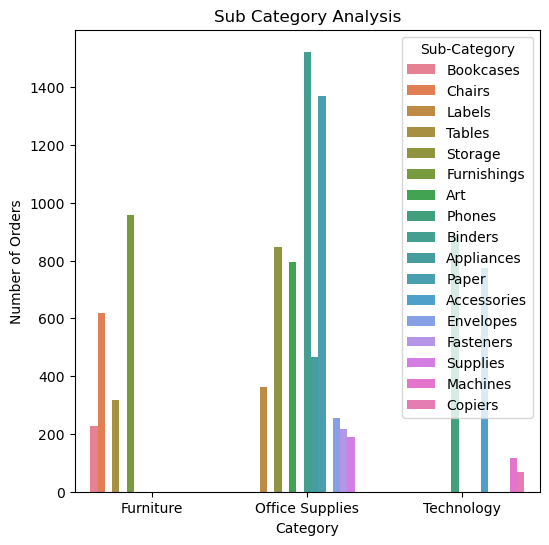

In [105]:
plt.figure(figsize=(6,6))
sns.countplot(x="Category",data=dataset,hue="Sub-Category")
plt.title("Sub Category Analysis")
plt.ylabel("Number of Orders")
plt.savefig("Category with Sub Category.jpg")
plt.show()

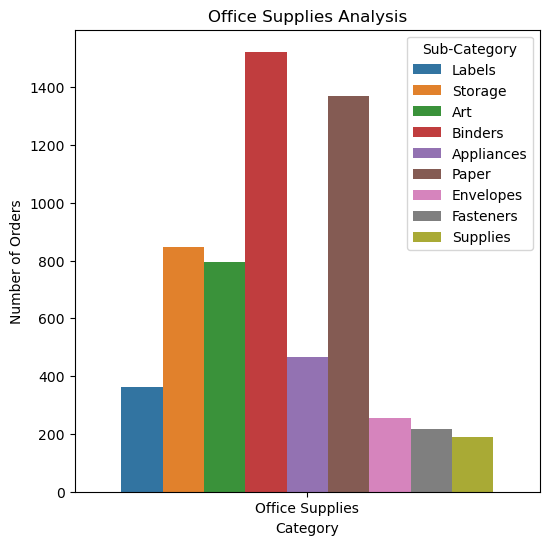

In [109]:
plt.figure(figsize=(6,6))
sns.countplot(x="Category",data=dataset[dataset["Category"]=="Office Supplies"],hue="Sub-Category")
plt.title("Office Supplies Analysis")
plt.ylabel("Number of Orders")
plt.savefig("Office Supplies with Sub Category.jpg")
plt.show()

In [ ]:
#Ship Mode and Category Analysis

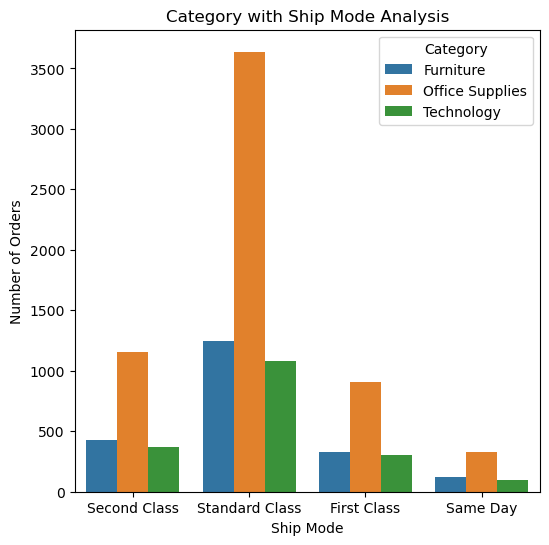

In [101]:
plt.figure(figsize=(6,6))
sns.countplot(x="Ship Mode",data=dataset,hue="Category")
plt.title("Category with Ship Mode Analysis")
plt.ylabel("Number of Orders")
plt.savefig("Category with Ship Mode Analysis.jpg")
plt.show()

In [ ]:
#Year Wise Sales

In [134]:
dataset["Order Year"].value_counts()

Order Year
2017    3312
2016    2587
2015    2102
2014    1993
Name: count, dtype: int64

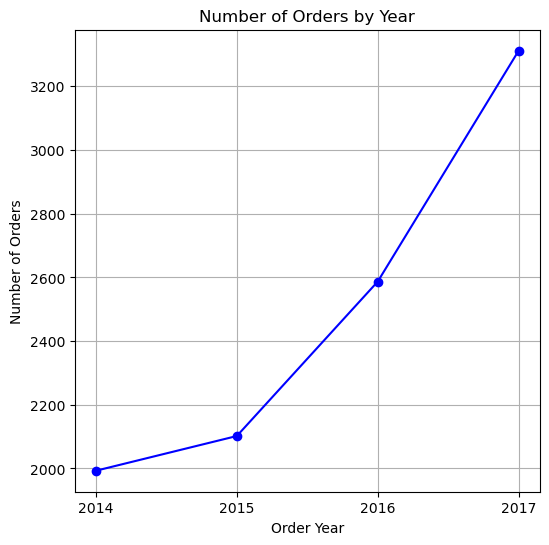

In [138]:
plt.figure(figsize=(6, 6))
plt.plot(dataset['Order Year'].value_counts().index, dataset['Order Year'].value_counts().values, marker='o', linestyle='-', color='b')
plt.xlabel('Order Year')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Year')
plt.grid(True)
plt.savefig("Order by Year.jpg")
plt.xticks(dataset['Order Year'].value_counts().index)
plt.show()

In [140]:
#Category Wise Profit

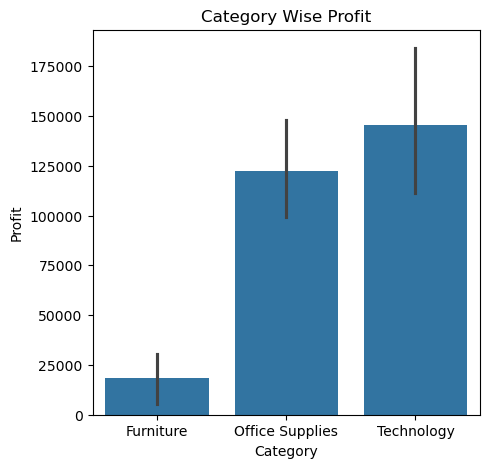

In [156]:
plt.figure(figsize=(5,5))
sns.barplot(x="Category",y="Profit",data=dataset,estimator="sum")
plt.title("Category Wise Profit")
plt.savefig("Category Wise Profit.jpg")
plt.show()

In [150]:
#States With Maximum Orders

In [154]:
dataset["State"].value_counts()[:5]

State
California      2001
New York        1128
Texas            985
Pennsylvania     587
Washington       506
Name: count, dtype: int64